In [1]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import math
%matplotlib inline

In [51]:
from processImage import *
%matplotlib inline

def detect(image_path):
    # reading in an image
    image_origin = mpimg.imread(image_path)
    gaussian_blur(image_origin, 5)
    # plt.figure()
    # plt.imshow(grayscale(image_origin), cmap='gray')
    edges = canny(image_origin, 50, 150)
    # plt.figure()
    # plt.imshow(edges, cmap='Greys_r')

    # This time we are defining a four sided polygon to mask
    imshape = image_origin.shape
    vertices = np.array([[(0, imshape[0]), (400, 350), (600, 350), (imshape[1], imshape[0])]], dtype=np.int32)
    edges = region_of_interest(edges, vertices)
    plt.figure()
    plt.imshow(edges, cmap='Greys_r')

    line_img = hough_lines(edges, rho, theta, threshold, 28, 10)
    output_img = cv2.addWeighted(image_origin, 0.8, line_img, 1, 0)
    plt.figure()
    plt.imshow(output_img)

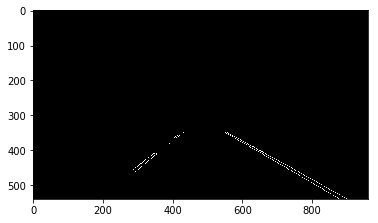

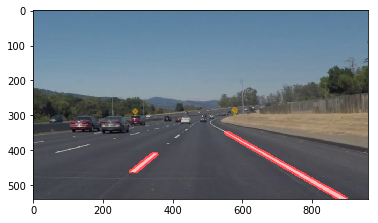

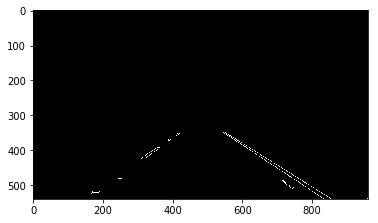

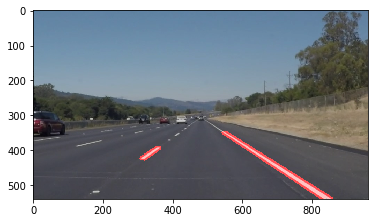

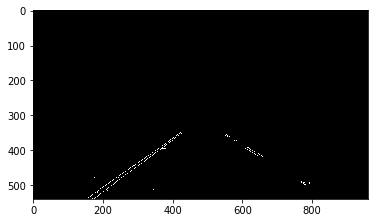

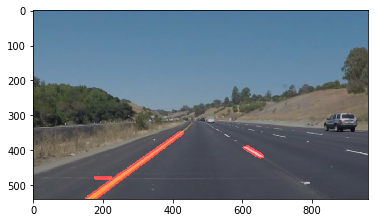

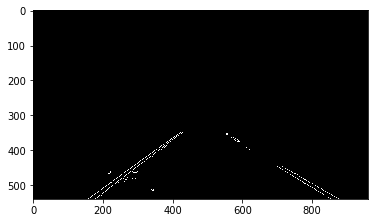

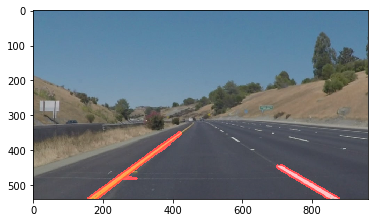

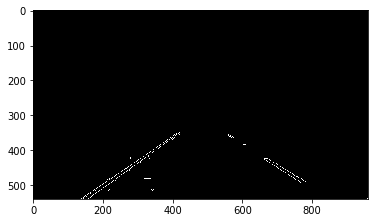

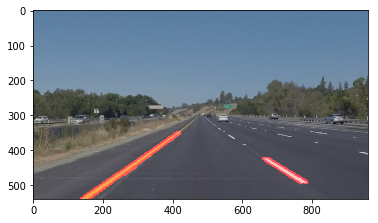

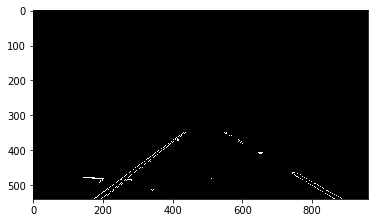

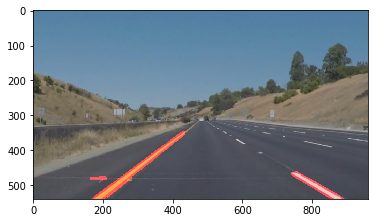

In [52]:
import os
import processImage
dir="test_images/"
file_names=os.listdir("test_images/")
for n in file_names:
    des_file=dir+n
    detect(des_file)